<a href="https://colab.research.google.com/github/erhnk/Churn-Modelling/blob/main/Lojistik_Regresyon_%C4%B0le_Model_Kurma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOJİSTİK REGRESYON**

In [131]:
#Standart parametreler ile model kuralım ve başarısını test edelim.

In [145]:
sınıflandirici_logistic = LogisticRegression()
sınıflandirici_logistic.fit(X_train,y_train)
y_pred_logistic = sınıflandirici_logistic.predict(X_test)

In [146]:
print('isabetlilik değeri:', accuracy_score(y_test,(y_pred_logistic)>0.5)*1)

isabetlilik değeri: 0.8333333333333334


Lojistik Regresyon için confusion_matrix :

 AxesSubplot(0.125,0.125;0.62x0.755)


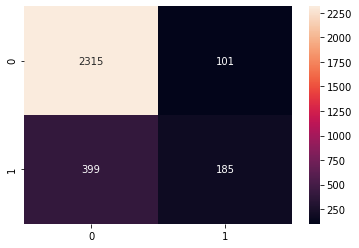

In [140]:
logistic_confusion = sns.heatmap(confusion_matrix(y_test,((y_pred_logistic)>0.5)*1), annot=True, fmt='g');
print("Lojistik Regresyon için confusion_matrix :\n\n",logistic_confusion)

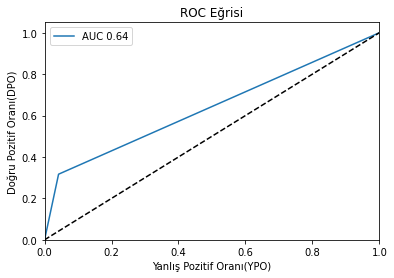

In [147]:
ypo,dpo,esikDeger = roc_curve(y_test,((y_pred_logistic)>0.5)*1)
aucDegeri = auc(ypo,dpo)
plt.figure()
plt.plot(ypo,dpo,label = "AUC %0.2f" %aucDegeri)
plt.plot([0,1],[0,1],"k--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("Yanlış Pozitif Oranı(YPO)")
plt.ylabel("Doğru Pozitif Oranı(DPO)")
plt.title("ROC Eğrisi")
plt.legend(loc = "best")
plt.show()

In [149]:
print(classification_report(y_test,((y_pred_logistic)>0.5)*1))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2416
           1       0.65      0.32      0.43       584

    accuracy                           0.83      3000
   macro avg       0.75      0.64      0.66      3000
weighted avg       0.81      0.83      0.81      3000



In [77]:
#Standart parametreler ile kurulan modelde isabetlilik skoru 0.8333, doğru tahmin sayısı 2500, auc skoru 0.64 ve f1-score'u 0.43 olarak elde edilmiştir.

LOJİSTİK REGRESYON İÇİN MODEL TUNİNG

In [150]:
tuned_parameters = [{'solver': ['newton-cg','lbfgs','liblinear','sag', 'saga'],
                     "C": [0.1,0.01,1,5,10,20,50,80,100,200],
                     "max_iter":[10,15,30,50,100,200,400,500,1000],
                     'penalty': ['none','l1',"l2",'elasticnet']}]

cValidation_search = GridSearchCV(sınıflandirici_logistic, tuned_parameters, cv=10, scoring ='accuracy',n_jobs=-1,error_score=0)
cValidation_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=0,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.1, 0.01, 1, 5, 10, 20, 50, 80, 100, 200],
                          'max_iter': [10, 15, 30, 50, 100, 200, 400, 500,
                                       1000],
                          'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
      

In [151]:
print('En iyi model : ', cValidation_search.best_params_)
print('Bu modelin ortalama skoru (accuracy) :', cValidation_search.best_score_)

En iyi model :  {'C': 1, 'max_iter': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Bu modelin ortalama skoru (accuracy) : 0.8208571428571428


En iyi parametrelere göre model kurulması

In [152]:
sınıflandirici_logistic1 = LogisticRegression(C = 1, max_iter=10, penalty='l2', solver= 'lbfgs')
sınıflandirici_logistic1.fit(X_train,y_train)
y_pred_logistic1 = sınıflandirici_logistic1.predict(X_test)

En iyi parametrelere göre performans

In [153]:
print('isabetlilik değeri:', accuracy_score(y_test,y_pred_logistic1))

isabetlilik değeri: 0.8343333333333334


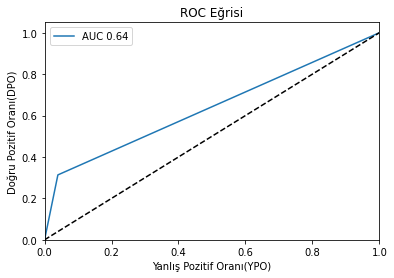

In [154]:
ypo,dpo,esikDeger = roc_curve(y_test,y_pred_logistic1)
aucDegeri = auc(ypo,dpo)
plt.figure()
plt.plot(ypo,dpo,label = "AUC %0.2f" %aucDegeri)
plt.plot([0,1],[0,1],"k--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("Yanlış Pozitif Oranı(YPO)")
plt.ylabel("Doğru Pozitif Oranı(DPO)")
plt.title("ROC Eğrisi")
plt.legend(loc = "best")
plt.show()

Destek Vektör Makineleri için confusion_matrix :

 AxesSubplot(0.125,0.125;0.62x0.755)


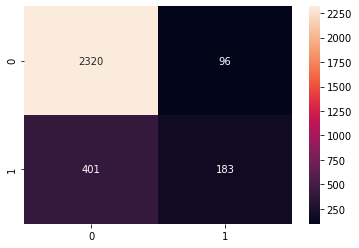

In [155]:
logistic1_confusion = sns.heatmap(confusion_matrix(y_test,y_pred_logistic1), annot=True, fmt='g');
print("Destek Vektör Makineleri için confusion_matrix :\n\n",logistic1_confusion)

In [156]:
print(classification_report(y_test,y_pred_logistic1))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2416
           1       0.66      0.31      0.42       584

    accuracy                           0.83      3000
   macro avg       0.75      0.64      0.66      3000
weighted avg       0.81      0.83      0.81      3000



In [ ]:
#En iyi parametreler ile kurulan LogisticRegression modelinin başarısı ölçüldüğünde isabetlilik değeri 0.8343, doğru tahmin sayısı 2503 ve auc skoru 0.64 olarak elde edilmiştir.
#Yeni parametreler ile kurulan modelin isabetlilik skoru daha yüksek olmasına rağmen bankadan ayrılan kişi sayısını tespit etmede 2 kişiyi kaçırmıştır.
#Yeni parametreler ile kurulan modelin f1-score'u 0,01 azalmıştır.
#Bu modelin destek vektör makinelerine göre performansının biraz daha düşük kaldığı söylenebilir.